Test:   0%|          | 0/198 [00:00<?, ?it/s]


Test loss: 0.1714 | Test acc: 0.9602

Classification Report (Test):
              precision    recall  f1-score   support

           0     1.0000    0.7667    0.8679        60
           1     0.9863    1.0000    0.9931       720
           2     0.9803    0.9947    0.9874       750
           3     1.0000    0.9667    0.9831       450
           4     0.9969    0.9879    0.9924       660
           5     0.9533    0.9730    0.9631       630
           6     0.9855    0.9067    0.9444       150
           7     0.9933    0.9956    0.9945       450
           8     0.9590    0.9867    0.9726       450
           9     1.0000    1.0000    1.0000       480
          10     1.0000    1.0000    1.0000       660
          11     0.9722    0.9976    0.9847       420
          12     0.9954    0.9333    0.9634       690
          13     0.9876    0.9958    0.9917       720
          14     1.0000    1.0000    1.0000       270
          15     1.0000    0.9905    0.9952       210
          16

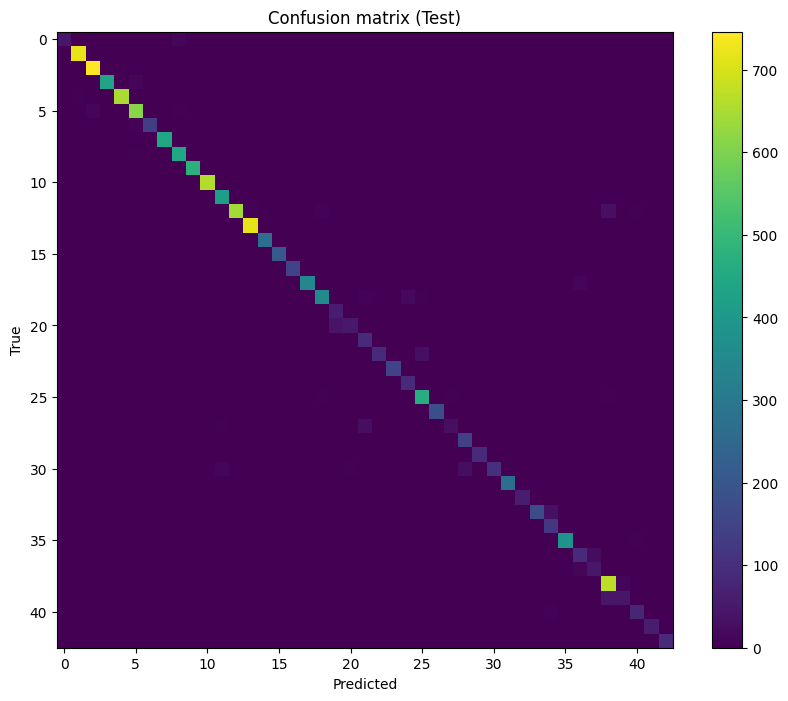

In [ ]:
ckpt = torch.load(save_path, map_location=device, weights_only=False)  
model.load_state_dict(ckpt["model_state"])
model = model.to(device)
model.eval()

test_loss = 0.0
all_preds = []
all_targets = []
with torch.no_grad():
    pbar = tqdm(test_loader, desc="Test", leave=False)
    for imgs, labels in pbar:
        imgs = imgs.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * imgs.size(0)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds.tolist())
        all_targets.extend(labels.cpu().numpy().tolist())

test_loss = test_loss / len(test_loader.dataset)
test_acc  = accuracy_score(all_targets, all_preds)
print(f"\nTest loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

target_names = [str(idx_to_class[i]) for i in range(num_classes)]
print("\nClassification Report (Test):")
print(classification_report(all_targets, all_preds, target_names=target_names, digits=4))

cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(10,8))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion matrix (Test)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
